In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import imutils
import math
%matplotlib inline

In [2]:
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

In [3]:
def card_detect(loc):
    imarray= np.array(cv2.imread(loc, 0))
    print (imarray.shape)
    imblur= cv2.GaussianBlur(imarray, (5,5), 0)
    plt.imshow(imblur, cmap= 'gray')
    plt.title("After Gaussian Blur")
    plt.show()
    alpha= 1.5
    beta= 0
    imcontrast= cv2.convertScaleAbs(imblur, alpha=alpha, beta=beta)
    plt.imshow(imcontrast, cmap= 'gray')
    plt.title("After Contrast")
    plt.show()
    
    edgearray= cv2.Canny(imblur, 25, 180)
    plt.imshow(edgearray, cmap= 'gray')
    plt.title("After Edge detection")
    plt.show()
    cnts = cv2.findContours(edgearray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:9]
    print (len(cnts))
    
    cntsarray= []
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.009*peri, True)
        if len(approx) == 4:#cards will be a rectangle always
            cntsarray.append(approx)
            
    imarraycolor= np.array(cv2.imread(loc))
    print (len(cntsarray))
    cv2.drawContours(imarraycolor, cntsarray, -1, (0, 255, 0), 3)
    plt.imshow(imarraycolor)
    plt.title("Contours detected")
    plt.show()
    cv2.imwrite('./op.png', imarraycolor)


(1032, 581)


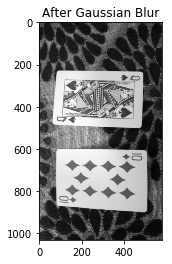

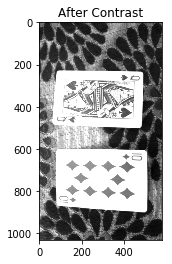

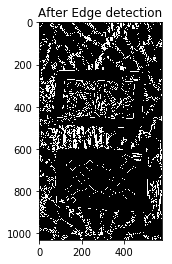

9
1


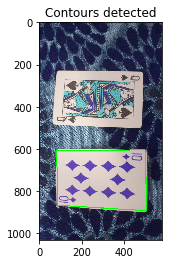

In [5]:
card_detect('./im1.jpeg')